# Efficient Frontier

In [2]:
import pandas as pd

returns = pd.read_csv("../data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99) / 100

returns.index = pd.to_datetime(returns.index, format="%Y%m").to_period("M")

returns

/var/folders/sw/bxz8j14j0gn9_prt5kh2xc4m0000gn/T/ipykernel_58148/1413946087.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns = pd.read_csv("../data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99) / 100


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [3]:
returns.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [4]:
returns.columns = returns.columns.str.strip()

returns.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import importlib, sys

sys.path.insert(1, f"../week-one")
erk = importlib.import_module("edhec-risk-kit")


In [7]:
ind = erk.get_industry_returns()

ind.shape

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-two/../week-one/edhec-risk-kit.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv(


(1110, 30)

In [8]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


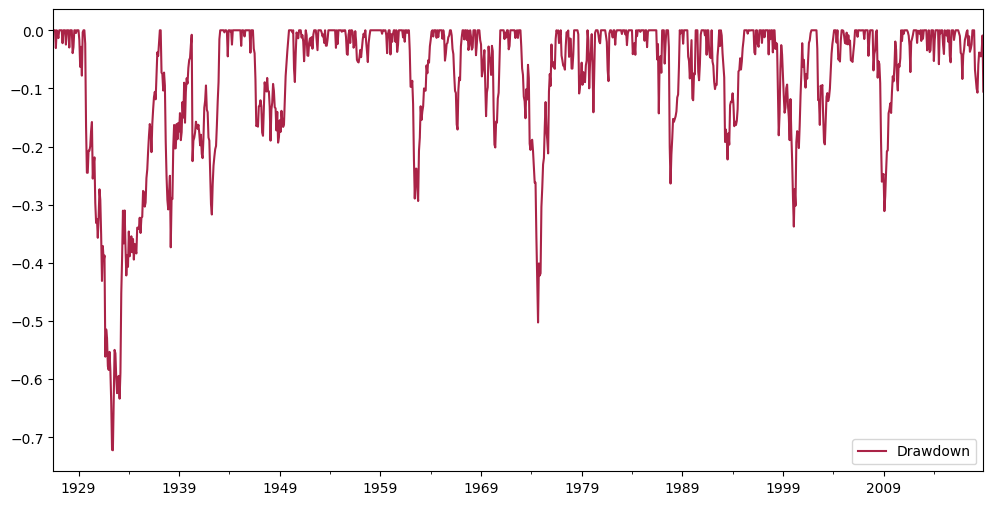

In [9]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))

food_drawdown = erk.create_drawdown(ind["Food"])["Drawdown"]

food_drawdown.plot(color="#aa2347", legend="Food Drawdown")

plt.show()

In [10]:
# let's get the Cornish-Fisher computed VaR
erk.var_gaussian(ind[["Food", "Smoke", "Coal", "Beer", "Fin"]], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [11]:
# industries with high VaR
erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [12]:
# industries with low VaR
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

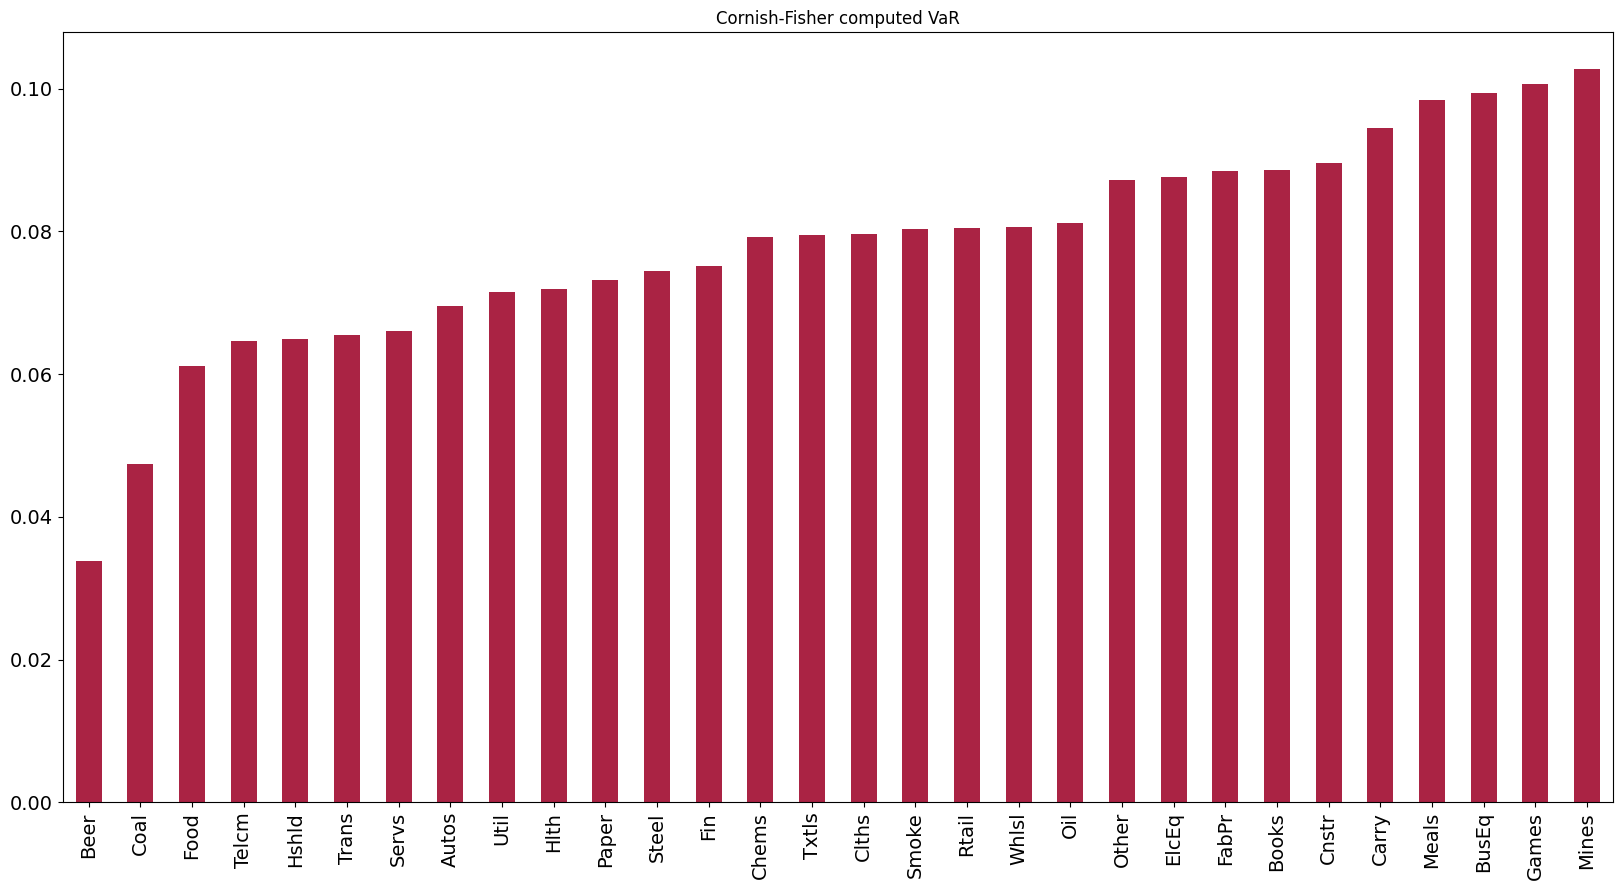

In [13]:
figure = plt.figure(figsize=(20, 10))

cornish_fisher_var = erk.var_gaussian(ind, modified=True).sort_values()

cornish_fisher_var.plot.bar(color="#aa2344", title="Cornish-Fisher computed VaR", fontsize=14)

plt.show()

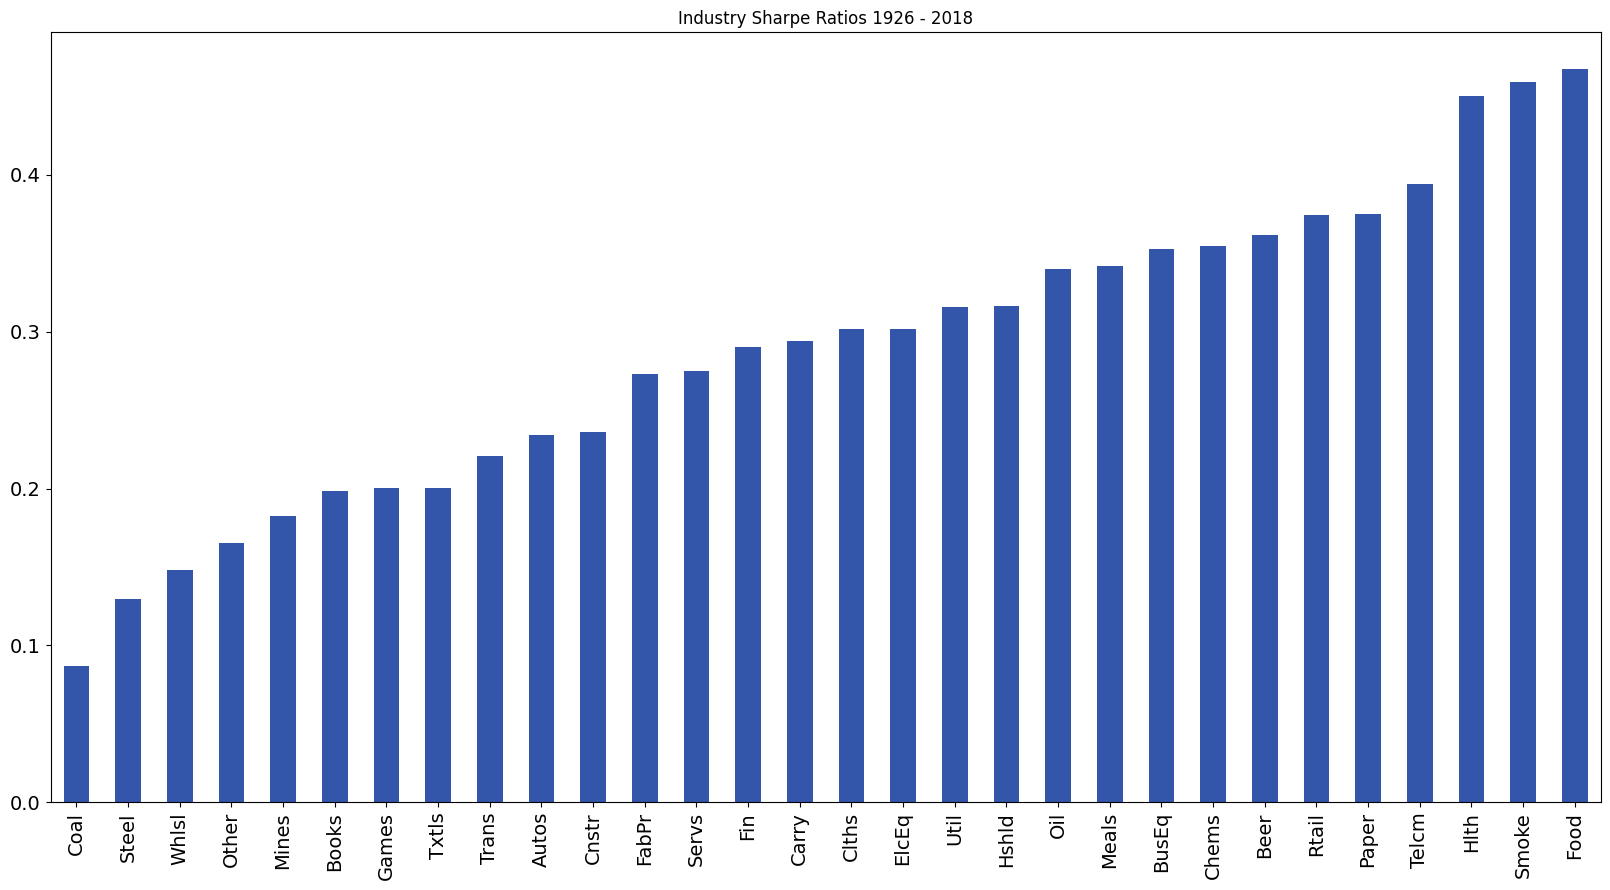

In [14]:
ind_sharpe_ratio = erk.sharpe_ratio(ind, 12).sort_values()

figure = plt.figure(figsize=(20, 10))

ind_sharpe_ratio.plot.bar(ind_sharpe_ratio, color="#3355aa", fontsize=14)

plt.title("Industry Sharpe Ratios 1926 - 2018")

plt.show()

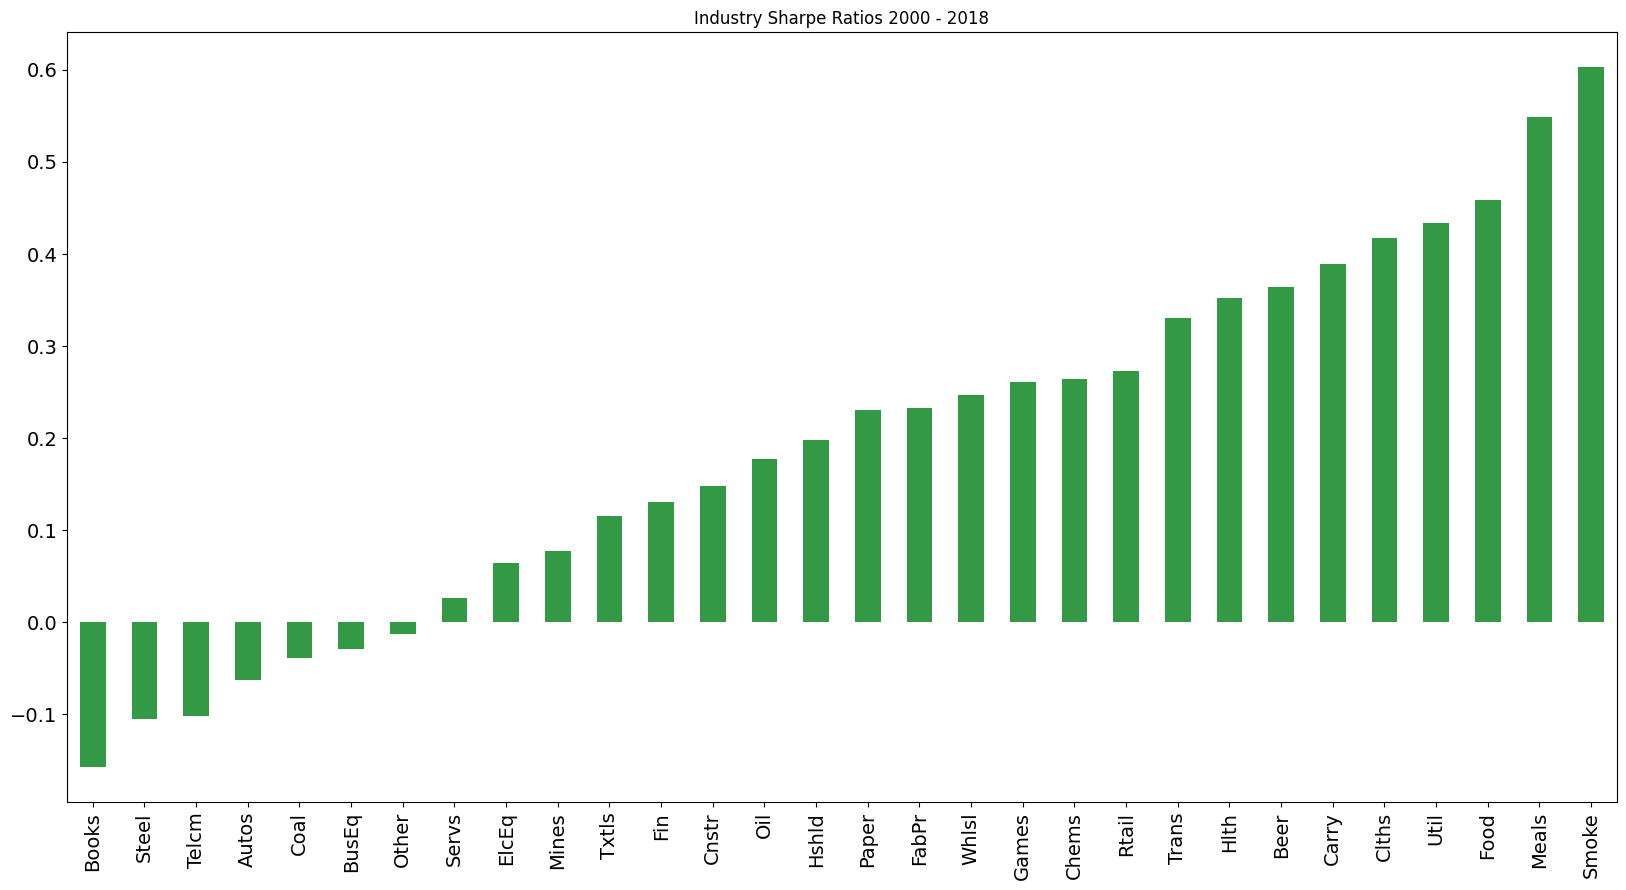

In [15]:
figure= plt.figure(figsize=(20, 10))

erk.sharpe_ratio(ind["2000":], 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000 - 2018", color="#339944", fontsize=14)

plt.show()

#### Computing the Efficient Frontier

To compute the Efficient Frontier we need two set of things:
* a list of expected returns
* a covariance matrix

A covariance matrix is a square matrix that shows the covariance between different variables in a dataset. 

Covariance is a measure of how much two random variables change together. If the variables tend to increase together, the covariance is positive; if one tends to increase while the other decreases, the covariance is negative.

_The diagonal of a covariance matrix is the variance of the asset itself_

<Axes: >

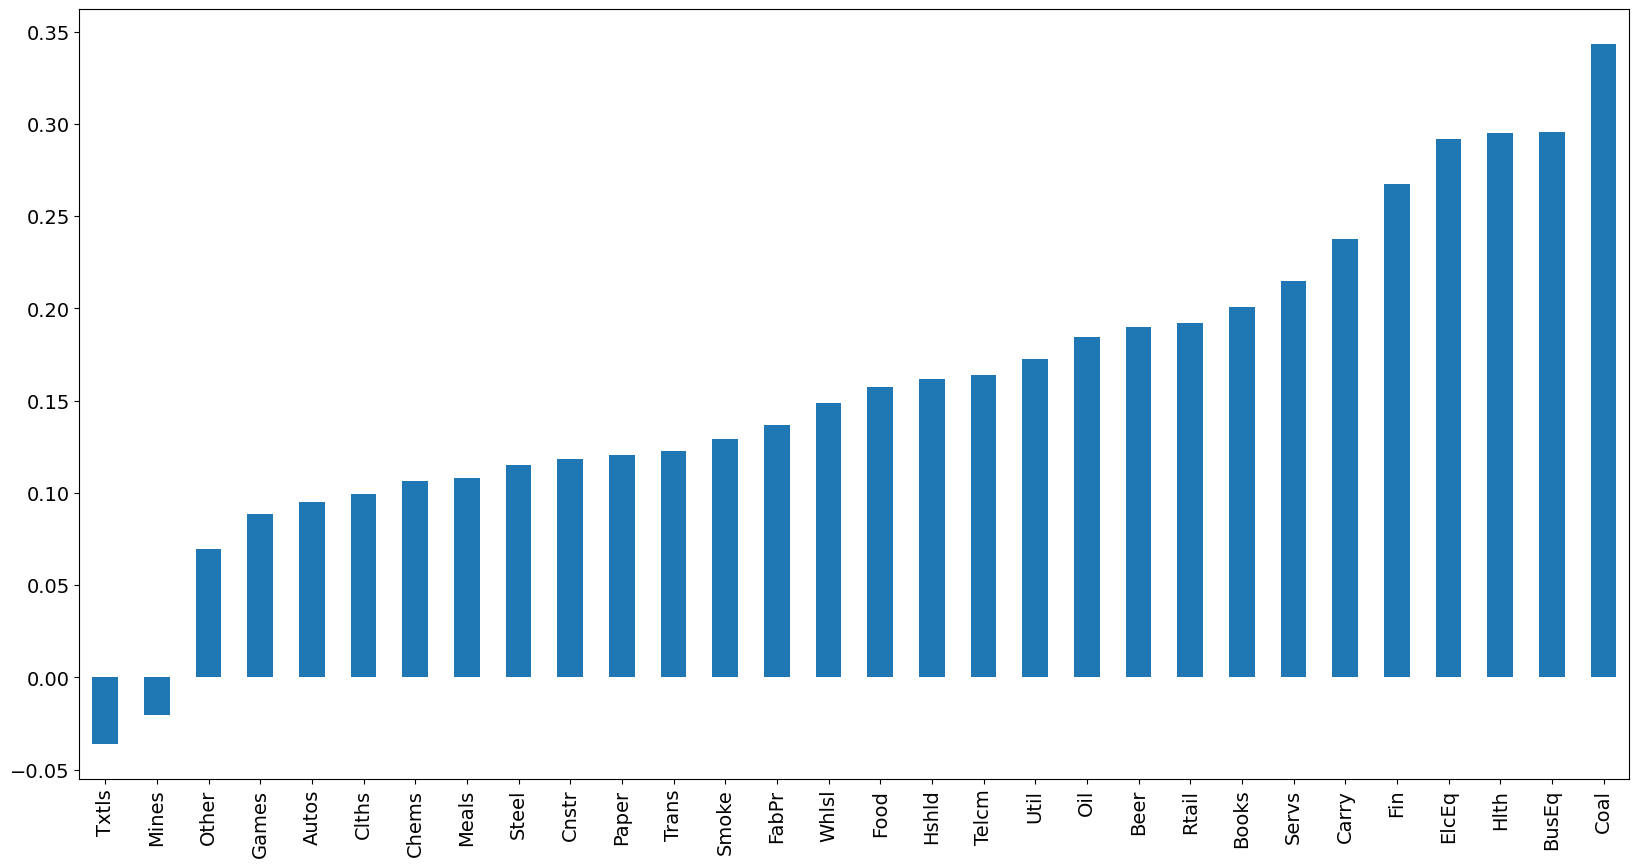

In [16]:
annualized_returns_1995_2000 = erk.annualize_returns(ind["1995":"2000"], 12)

figure = plt.figure(figsize=(20, 10))

annualized_returns_1995_2000.sort_values().plot.bar(fontsize=14)

In [17]:
# generating covariance matrix
cov = ind["1995":"2000"].cov()

cov.shape

(30, 30)

In [18]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


## Efficient Frontier Part II

In [20]:
ind = erk.get_industry_returns()
annualized_returns_1996_2000 = erk.annualize_returns(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

cov

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-two/../week-one/edhec-risk-kit.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv(


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


#### Calculating Portfolio Return and Volatility


**Portfolio Return**

$$R_p = w^TR$$

*where:*
* $w^T$ is the transpose of the weight $(k x 1)$ vector
* $R$ is asset returns

**Portfolio Variance**

$$𝛔_p^2 = w^T\sum{w}$$

**Portfolio Volatility**

$$\sqrt{𝛔_p^2}$$

*where:*

* $w^T$ = weights transpose
* $\sum$ = $𝛔_{ij}$ = $𝛔_i * 𝛔_j * ⍴_{ij}$
* weights is how you intend to allocate capital to each asset

In [21]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covariance_matrix):
    """
    Weights -> Volatility
    """
    return (weights.T @ covariance_matrix @ weights) ** 0.5

In [24]:
assets_spec = ["Food", "Beer", "Smoke", "Coal"]
annualized_returns_1996_2000[assets_spec]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [25]:
cov.loc[assets_spec, assets_spec]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [26]:
import numpy as np

weights = np.repeat(1/4, 4)
# erk.portfolio_return()

weights

array([0.25, 0.25, 0.25, 0.25])

In [27]:
erk.portfolio_return(weights, annualized_returns_1996_2000[assets_spec])

0.19511097196038385

In [30]:
erk.portfolio_volatility(weights, cov.loc[assets_spec, assets_spec])

0.055059195776437045

### 2 Asset Frontier

In [31]:
assets_spec = ["Games", "Fin"]

In [32]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [45]:
annualized_returns_1996_2000[assets_spec]

Games    0.068212
Fin      0.223371
dtype: float64

In [37]:
returns = [erk.portfolio_return(w, annualized_returns_1996_2000[assets_spec]) for w in weights]
volatilities = [erk.portfolio_volatility(w, cov.loc[assets_spec, assets_spec]) for w in weights]

portfolio_df = pd.DataFrame({
    "Portfolio Returns": returns,
    "Portfolio Volatilities": volatilities
})

portfolio_df

,Portfolio Returns,Portfolio Volatilities
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


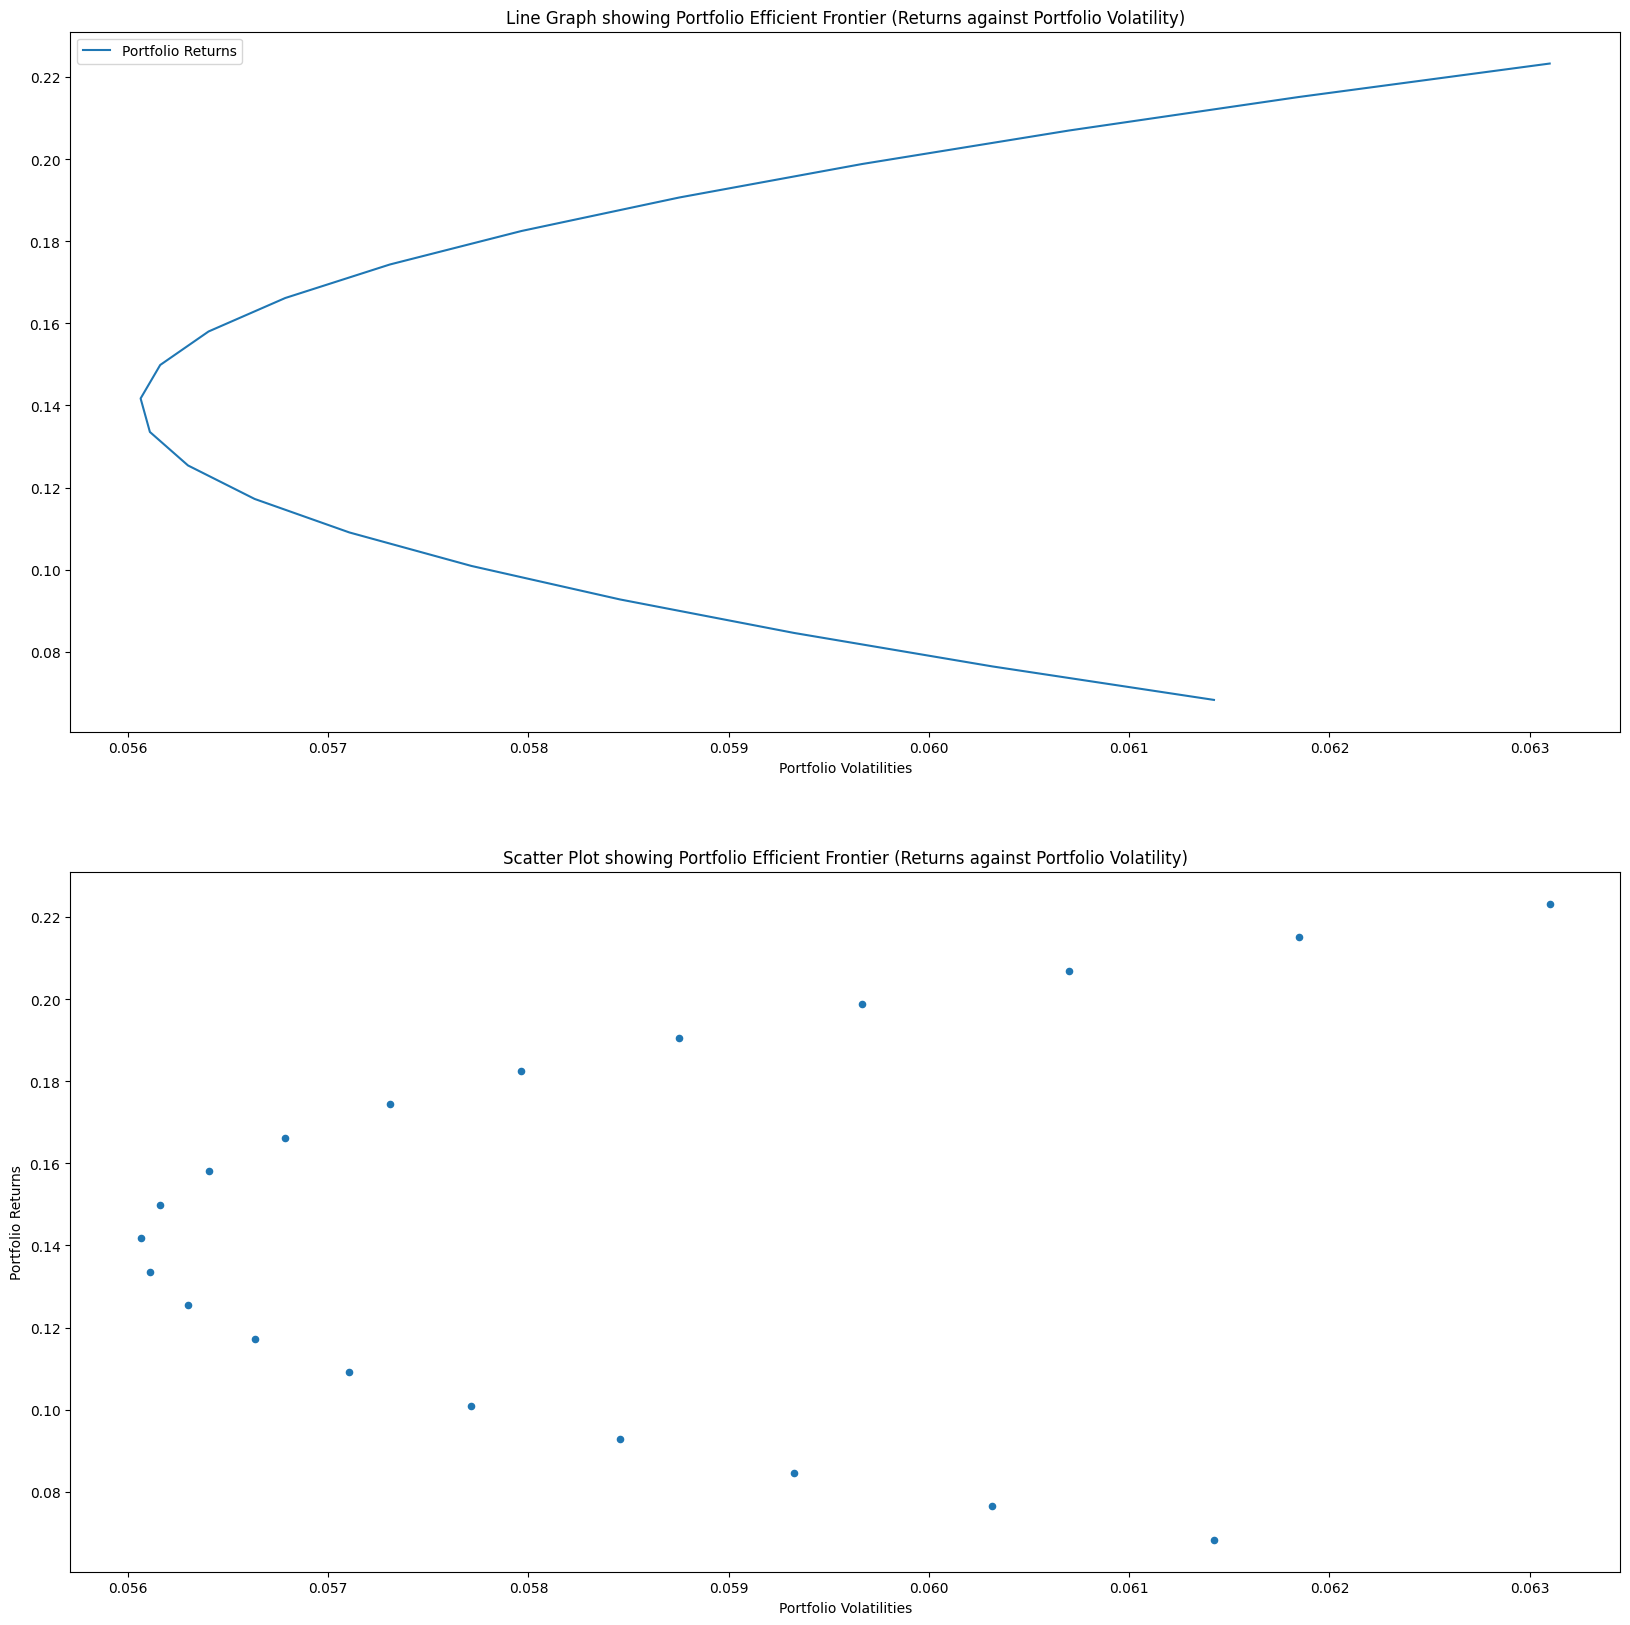

In [44]:
figure = plt.figure(figsize=(20, 20))

ax1 = figure.add_subplot(211)
ax2 = figure.add_subplot(212)

portfolio_df.plot.line(ax=ax1, x="Portfolio Volatilities", y="Portfolio Returns")
portfolio_df.plot.scatter(ax=ax2, x="Portfolio Volatilities", y="Portfolio Returns")

ax1.set_title("Line Graph showing Portfolio Efficient Frontier (Returns against Portfolio Volatility)")

ax2.set_title("Scatter Plot showing Portfolio Efficient Frontier (Returns against Portfolio Volatility)")

plt.show()

In [52]:
assets_spec = ["Fin", "Beer"]

annualized_returns_1996_2000[assets_spec]

Fin     0.223371
Beer    0.141126
dtype: float64

<Axes: xlabel='Portfolio Volatilities'>

<Figure size 2000x2000 with 0 Axes>

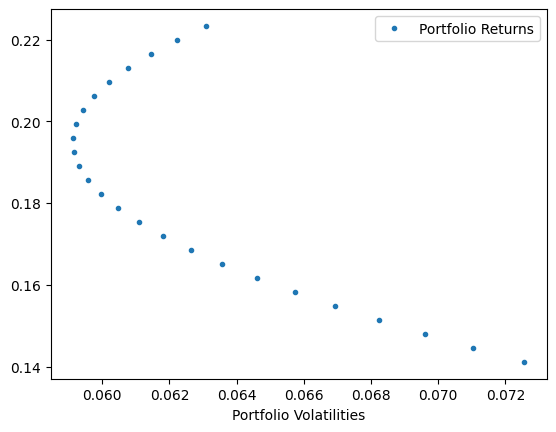

In [58]:
erk.plot_efficient_frontier(25, annualized_returns_1996_2000[assets_spec], cov.loc[assets_spec, assets_spec], style=".")